In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Business Understanding

The goal of this work is to understand the impact of software developer role types on job satisfaction. In particular, we are interested in addressing the following questions:

1. What is the magnitude of the effect of developer role types on job satisfaction compared to other factors?
2. How do developer roles compare to one another in the job satisfaction reported in the survey?
3. Are the reported differences in job satisfaction among developer roles statistically significant?

**Note** that question (1) is addressed in the notebook `Predict JobSat.ipynb`.

# Data Understanding

A key step toward  understanding the data in order to answer our questions was reading the descriptions of the survey and dataset, found at the 2020 "Download Full Dataset (CSV)" link from this page: https://insights.stackoverflow.com/survey/.

I determined that the following survey responses would be useful for addressing Question (1):

- Age of respondent
- Age began coding 
- Country of residence 
- Compensation (converted to U.S. dollars)
- Developer Type (one or more types of development done by respondent)
- Educational Importance (self-assessed importance of education to respondent’s career)
- Education Level (level of formal education)
- Gender
- Hobbyist (whether respondent codes as a hobby)
- Learn (frequency of learning a new language or framework)
- Org Size (size of respondent’s employer)
- Overtime (frequency of overtime work)
- Undergrad Major (primary field of study for college attendees)
- Years Coded (total number of years respondent has coded)
- Years Coded Professionally.

## Load Data

In [2]:
df_2020 = pd.read_csv(r'data\StackOverflow\developer_survey_2020\survey_results_public.csv')

In [3]:
df_2020.shape

(64461, 61)

## Investigate Data/Features

In [4]:
cols = list(df_2020.columns)
cols.sort
cols

['Respondent',
 'MainBranch',
 'Hobbyist',
 'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Sexuality',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

In [229]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

### Feature Checks and Transformations

#### Job Sat

We have `JobSat` entries for 70% of respondents, 45,000.

In [438]:
df_2020.JobSat.notnull().sum(), df_2020.JobSat.notnull().mean()

(45194, 0.7011060951583128)

In [439]:
df_2020.JobSat.isna().sum(), df_2020.JobSat.isna().mean()

(19267, 0.2988939048416872)

#### Employment

In [231]:
df_2020.Employment.isna().mean()

0.009416546438932067

In [234]:
empl_counts = df_2020.Employment.value_counts()
empl_counts

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

If `Employment` indicates respondent is not employed, is `JobSat` empty?

**Answer:** Yes, if they are not employed, there is jo `JobSat` entry. i.e., no JobSat entry for:
- Student
- Not employed, but looking
- Not employed, not looking
- Retired

In [240]:
for status in empl_counts.index:
    subdf = df_2020[df_2020.Employment == status]
    jobsatna = subdf.JobSat.isna()
    print(f"{status}: {jobsatna.sum()} {jobsatna.mean()*100}%")

Employed full-time: 6225 13.750828363154408%
Student: 7787 100.0%
Independent contractor, freelancer, or self-employed: 1112 19.605077574047954%
Not employed, but looking for work: 2343 100.0%
Employed part-time: 755 34.055029318899415%
Not employed, and not looking for work: 322 100.0%
Retired: 243 100.0%


#### Main Branch

Similarly to `Employment`, if the status is inappropriate, there is no `JobSat` entry.

In [440]:
main_branch_counts = df_2020.MainBranch.value_counts()
main_branch_counts

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [441]:
for status in main_branch_counts.index:
    subdf = df_2020[df_2020.MainBranch == status]
    jobsatna = subdf.JobSat.isna()
    print(f"{status}: {jobsatna.sum()} {jobsatna.mean()*100}%")

I am a developer by profession: 6429 13.622783039857605%
I am a student who is learning to code: 7970 100.0%
I am not primarily a developer, but I write code sometimes as part of my work: 1072 19.483824063976733%
I code primarily as a hobby: 2314 100.0%
I used to be a developer by profession, but no longer am: 1183 100.0%


#### JobSeek
This won't be of interest for this investigation.

In [242]:
df_2020.JobSeek.value_counts()

I’m not actively looking, but I am open to new opportunities    29776
I am not interested in new job opportunities                    13001
I am actively looking for a job                                  8950
Name: JobSeek, dtype: int64

#### UndergradMajor

7% have nan here -- could fill with 'No Entry'.

In [448]:
df_2020[df_2020.JobSat.notnull()].UndergradMajor.isna().mean()

0.07443465946807098

In [245]:
df_2020.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31582
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4754
Information systems, information technology, or system administration              4071
A natural science (such as biology, chemistry, physics, etc.)                      2205
Mathematics or statistics                                                          1849
Web development or web design                                                      1789
A business discipline (such as accounting, finance, marketing, etc.)               1375
A humanities discipline (such as literature, history, philosophy, etc.)            1007
A social science (such as anthropology, psychology, political science, etc.)        933
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      725
I never declared a major                                                            453
A health science (such as nursin

#### Tools

In [246]:
df_2020.WebframeWorkedWith.value_counts()

jQuery                                                  2079
React.js                                                1917
Spring                                                  1350
Flask                                                   1074
Django                                                   920
                                                        ... 
Angular.js;ASP.NET;jQuery;Laravel;React.js;Vue.js          1
Angular;ASP.NET Core;Express;jQuery;Symfony                1
ASP.NET;Django;Express;jQuery;React.js;Ruby on Rails       1
ASP.NET Core;Django;Express;Flask                          1
Angular.js;Express;Laravel;React.js;Symfony;Vue.js         1
Name: WebframeWorkedWith, Length: 3789, dtype: int64

In [247]:
df_2020.WebframeWorkedWith.isna().mean()

0.3441150463070694

#### Age

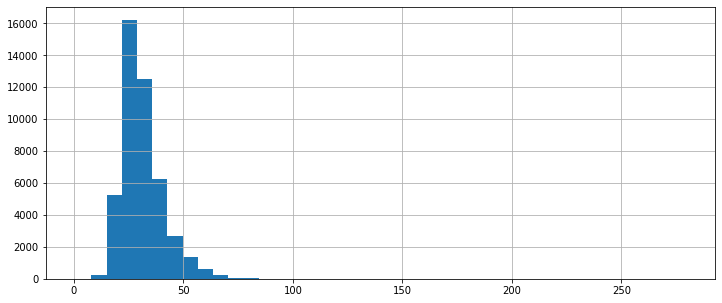

In [255]:
df_2020.Age.hist(figsize=(12,5), bins=40)

In [256]:
df_2020.Age.median()

29.0

In [435]:
sorted_age = df_2020.Age[~df_2020.Age.isna()].sort_values()

In [436]:
sorted_age[-50:]

5354      76.0
16601     76.0
19522     77.0
45457     77.0
5069      77.0
11018     77.0
3184      77.0
29732     78.0
11861     78.0
15138     78.0
24572     78.0
25741     78.0
56852     78.0
2023      78.0
14348     79.0
53504     79.0
48921     79.0
15162     79.0
47520     80.0
19935     80.0
30282     80.0
50908     81.0
16481     81.0
5689      81.0
52768     83.0
48649     83.0
1564      84.0
4833      85.0
12064     85.0
1199      86.0
33617     88.0
19863     89.0
58214     89.0
14779     94.0
1438      94.0
55778     95.0
7186      96.0
6382      97.0
21268     98.0
50963     99.0
52838     99.0
5926      99.0
2625      99.0
45324     99.0
56725     99.0
2510      99.0
26740     99.0
47567     99.0
56904     99.0
14375    279.0
Name: Age, dtype: float64

In [291]:
type(df_2020.Age[0])

numpy.float64

#### YearsCode

In [257]:
df_2020.YearsCode.value_counts()

10                    4510
5                     4249
6                     3834
7                     3477
8                     3407
4                     3254
3                     2951
15                    2586
20                    2562
12                    2453
9                     2344
2                     1916
11                    1691
14                    1479
13                    1468
25                    1338
16                    1203
30                    1114
18                    1089
17                    1057
1                      902
22                     792
Less than 1 year       757
19                     657
35                     599
23                     572
21                     550
40                     535
24                     449
26                     378
27                     335
28                     314
32                     309
38                     289
37                     258
36                     246
33                     236
3

In [303]:
def durationToNum(s):
    if s == 'Less than 1 year':
        return 0.5
    elif s == 'More than 50 years':
        return 55.0
    else:
        try:
            return float(s)
        except:
            return np.nan

In [294]:
df_2020.YearsCode.isna().mean()

0.10513333643598455

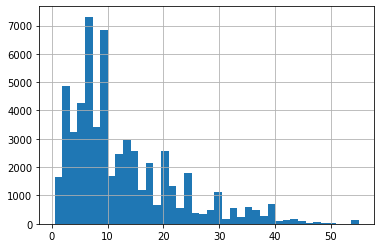

In [379]:
df_2020.YearsCode.apply(durationToNum).hist(bins=40)

In [297]:
type(df_2020.YearsCode.apply(durationToInt)[0])

numpy.float64

#### NEWOvertime

4% of respondents with non-null `JobSat` have no `NEWOvertime` value - recommend fillna().

In [444]:
df_2020[df_2020.JobSat.notnull()].NEWOvertime.isna().mean()

0.046156569456122495

In [258]:
df_2020.NEWOvertime.value_counts()

Sometimes: 1-2 days per month but less than weekly          11547
Often: 1-2 days per week or more                            11027
Occasionally: 1-2 days per quarter but less than monthly     9468
Rarely: 1-2 days per year or less                            6471
Never                                                        4718
Name: NEWOvertime, dtype: int64

In [442]:
overtime_categ = {'Never': 0, 
              'Rarely: 1-2 days per year or less': 1, 
              'Occasionally: 1-2 days per quarter but less than monthly': 2, 
              'Sometimes: 1-2 days per month but less than weekly': 3,
              'Often: 1-2 days per week or more': 4
             }
overtimeEncoder = ce.OrdinalEncoder(cols = ['NEWOvertime'], 
                                    mapping= [{'col': 'NEWOvertime', 'mapping': overtime_categ}])

#### Age1stCode

In [265]:
age1st_vc =df_2020.Age1stCode.value_counts()
age1st_vc

15    5618
14    5514
16    5463
18    5382
12    5081
      ... 
72       1
68       1
76       1
63       1
83       1
Name: Age1stCode, Length: 63, dtype: int64

In [272]:
type(df_2020.Age1stCode[df_2020.Age1stCode.isna()][74])

float

In [274]:
np.nan

nan

In [277]:
def age1stToInt(s):
    if s == 'Younger than 5 years':
        return 4
    elif s == 'Older than 85':
        return 86
    else:
        try:
            return int(s)
        except:
            return np.nan

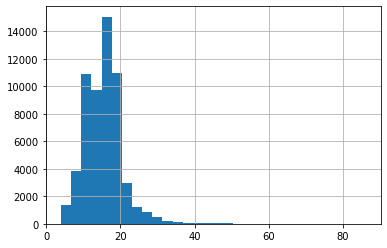

In [282]:
afc_numeric = df_2020.Age1stCode.apply(age1stToInt)
afc_numeric.hist(bins=30)

In [288]:
afc_numeric[afc_numeric > 60].sum()

2094.0

In [281]:
print(df_2020.Age1stCode.isna().mean())
df_2020.Age1stCode.apply(age1stToInt).isna().mean()

0.10178247312328384


0.10178247312328384

How many respondents of interest have nan values for Age1stCode? 0.5%

In [445]:
df_2020[df_2020.JobSat.notnull()].Age1stCode.isna().mean()

0.004956410142939328

#### OrgSize

In [447]:
df_2020[df_2020.JobSat.notnull()].OrgSize.isna().mean()

0.021573660220383237

In [446]:
df_2020.OrgSize.value_counts()

20 to 99 employees                                    9597
100 to 499 employees                                  8311
10,000 or more employees                              6149
1,000 to 4,999 employees                              4863
2 to 9 employees                                      4409
10 to 19 employees                                    4127
500 to 999 employees                                  2880
Just me - I am a freelancer, sole proprietor, etc.    2190
5,000 to 9,999 employees                              1808
Name: OrgSize, dtype: int64

#### NEWLearn

In [450]:
df_2020[df_2020.JobSat.notnull()].NEWLearn.isna().mean()

0.07817409390627074

In [453]:
df_2020.NEWLearn.value_counts()

Every few months        20938
Once a year             20693
Once every few years    13284
Once a decade            1241
Name: NEWLearn, dtype: int64

# Code

This section contains code to address several of the questions introduced in **Section 1** **Business Understanding**:
2. How do developer roles compare to one another in the job satisfaction reported in the survey?
3. Are the reported differences in job satisfaction among developer roles statistically significant?

## Weighted Satisfaction per DevType

The assessment of overall reported satisfaction with a developer role is complicated somewhat by the fact that a respondent can report multiple development type roles that they perform. These roles are represented in the dataset in the delimited string of the 'DevType' column.

The contribution of an individual's satisfaction to the mean satisfaction of a role should be proportional to the weight of that role in the individuals job. 

Since we have no information about the relative contribution of these roles to an individual's satisfaction, we divide the satisfaction score equally among the roles, weighting the satisfaction score by the reciprocal of the number of roles.

The weighted mean score for a role is then given by the sum of the weighted scores for that role, divided by the sum of the role's weights.

In [5]:
import category_encoders as ce

In [4]:
def explode_dev_type_with_weighting(df):
    """
    Explode the (delimited-string) DevType column into a row for each role. Also add
    a 'DevTypeWeight' column that indicates the fractional weight of this role to 
    attribute to an individual
    
    Arguments:
        df: dataFrame with column 'DevType'
    """
    # drop rows with NaN values for DevType
    df = (df
          .dropna(subset=['DevType'])
          .rename(columns={'DevType':'DevTypeString'}))
    
    # new DevType columns splits on ';' to create a list of dev types
    df['DevType'] = df.DevTypeString.str.split(';')
    
    # Weight attributable to one respondent for each DevType is reciprocal of DevType count
    df['DevTypeWeight'] = df['DevType'].apply(lambda x: 1 / len(x))
    
    df = (df
          .drop('DevTypeString', axis=1)
          .explode('DevType'))
    return df

In [6]:
def ordinalSatisfaction(df):
    """Replace string-valued 'JobSat' column with a numeric encoding.
    """
    categ_dict = {'Very dissatisfied': 0, 'Slightly dissatisfied': 1, 'Neither satisfied nor dissatisfied': 2,
              'Slightly satisfied': 3, 'Very satisfied': 4}
    ce_ord = ce.OrdinalEncoder(cols = ['JobSat'], 
                               mapping= [{'col': 'JobSat', 'mapping': categ_dict}])
    return ce_ord.fit_transform(df)

In [7]:
def ordinalAndWeightedJobSat(df):
    """Create weighted JobSat column.
    """
    df = ordinalSatisfaction(df)
    df['WeightedJobSat'] = df.JobSat * df.DevTypeWeight
    return df

In [8]:
def numericWeightedJobSat(df):
    """
    Convert input dataframe with StackOverflow columns 'JobSat' (categorical text)
    and 'DevType' (semicolon-delimited string values) to a more useable format for
    assessing satisfaction with job roles.
    
    The row for each respondent is exploded into a row for each role reported by the 
    respondent, and a 'WeightedJobSat' column that indicates the numeric per-role 
    weighted job satisfaction.
    
    Args:
        df(DataFrame): dataframe with StackOverflow columns 'JobSat' and 'DevType'
    """
    df = explode_dev_type_with_weighting(df)
    return ordinalAndWeightedJobSat(df)

### Weighted Satisfaction - All Countries Example
An example of using the per-devtype weighted satisfaction code. This illustrates how the code is used, and you can see examples of inputs and outputs. 

Also, generate some output used in the article (in the final cells of this section.)

This example starts with all rows in the Stack Overflow dataset (no selection on country).

In [21]:
# Extract the relevant columns so the dataframe views are readable.
# Note: removing null values for JobSat & DevType
ac_job_sat = df_2020[['DevType', 'JobSat']].dropna()
print(ac_job_sat.shape[0])
ac_job_sat.head(9)

44546


,DevType,JobSat
0,"Developer, desktop or enterprise applications;...",Slightly satisfied
1,"Developer, full-stack;Developer, mobile",Very dissatisfied
5,"Designer;Developer, front-end;Developer, mobile",Slightly satisfied
6,"Developer, back-end;Developer, front-end;Devel...",Very satisfied
7,"Developer, back-end;Developer, desktop or ente...",Slightly dissatisfied
8,"Developer, full-stack",Very dissatisfied
9,"Database administrator;Developer, full-stack;D...",Very satisfied
10,"Developer, back-end;Developer, desktop or ente...",Slightly dissatisfied
11,"Designer;Developer, front-end",Very dissatisfied


In [22]:
# Example call to numericWeightedJobSat()
ac_job_sat_weighted = numericWeightedJobSat(ac_job_sat)
ac_job_sat_weighted.head(8)

,JobSat,DevType,DevTypeWeight,WeightedJobSat
0,3,"Developer, desktop or enterprise applications",0.500000,1.5
0,3,"Developer, full-stack",0.500000,1.5
1,0,"Developer, full-stack",0.500000,0.0
1,0,"Developer, mobile",0.500000,0.0
5,3,Designer,0.333333,1.0
5,3,"Developer, front-end",0.333333,1.0
5,3,"Developer, mobile",0.333333,1.0
6,4,"Developer, back-end",0.250000,1.0


In [23]:
# Step one in computing mean JobSat by DevType
ac_grouped_sum = ac_job_sat_weighted[['DevType', 'DevTypeWeight', 'WeightedJobSat']].groupby('DevType').sum()
ac_grouped_sum

,DevTypeWeight,WeightedJobSat
DevType,,
Academic researcher,888.051196,2395.736629
Data or business analyst,1000.201960,2611.162929
Data scientist or machine learning specialist,1183.563455,3261.721378
Database administrator,1028.361029,2706.116779
Designer,1016.412390,2648.723427
DevOps specialist,1451.549018,3925.555635
"Developer, QA or test",957.209332,2499.289023
"Developer, back-end",9028.261843,23463.127283
"Developer, desktop or enterprise applications",3108.136598,8103.184842


In [12]:
# Step two in computing mean JobSat by DevType
ac_mean_js = pd.DataFrame(data=ac_grouped_sum.WeightedJobSat/ac_grouped_sum.DevTypeWeight, index=ac_grouped_sum.index, columns=['MeanJobSat'])
ac_mean_js = ac_mean_js.sort_values('MeanJobSat', ascending=False)

In [13]:
ac_mean_js

,MeanJobSat
DevType,
Senior executive/VP,2.941258
Scientist,2.813145
Data scientist or machine learning specialist,2.755848
DevOps specialist,2.704391
Academic researcher,2.697746
Engineering manager,2.696440
Educator,2.694235
"Developer, game or graphics",2.691284
"Engineer, data",2.681528


In [74]:
# Shorter names for display
DISPLAY_NAMES = {'Developer, desktop or enterprise applications':'Developer, desktop/enterprise',
                     'Data scientist or machine learning specialist': 'Data science / ML',
                     'Developer, embedded applications or devices': 'Developer, embedded'}

ac_mean_js.index = [DISPLAY_NAMES.get(name, name) for name in ac_mean_js.index]

In [96]:
# Drop roles we will not consider
ac_mean_js2 = ac_mean_js.drop(['Senior executive/VP', 'Marketing or sales professional'])

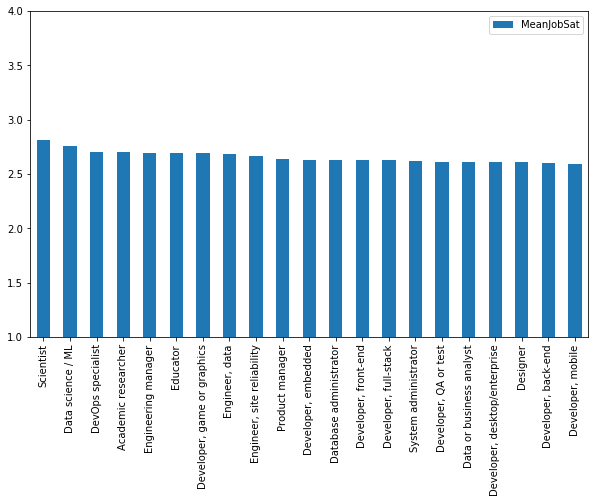

In [97]:
ac_mean_js2.plot.bar(figsize=(10,6), ylim=(1,4));

The next two cells are used to generate a figure for the article.

In [99]:
ac_mean_js2.head(11)

,MeanJobSat
Scientist,2.813145
Data science / ML,2.755848
DevOps specialist,2.704391
Academic researcher,2.697746
Engineering manager,2.696440
Educator,2.694235
"Developer, game or graphics",2.691284
"Engineer, data",2.681528
"Engineer, site reliability",2.661714
Product manager,2.642263


In [100]:
ac_mean_js2.tail(10)

,MeanJobSat
Database administrator,2.631485
"Developer, front-end",2.629232
"Developer, full-stack",2.626863
System administrator,2.622752
"Developer, QA or test",2.611016
Data or business analyst,2.610636
"Developer, desktop/enterprise",2.607088
Designer,2.605954
"Developer, back-end",2.598853
"Developer, mobile",2.588786


**Mean Satisfaction Score**

Compute the mean JobSat score across all respondents we are considering (those with defined values for 'DevType' and 'JobSat'.)

We use this mean value and the difference between it and min/max weighted score by dev type in the article.

In [102]:
# Convert JobSat response to numeric value 0 - 4
ord_job_sat = ordinalSatisfaction(ac_job_sat)
# Compute mean
ord_job_sat.JobSat.mean()

2.6323126655591973

In [103]:
# difference betwen overall mean and min score by dev type
2.632 - 2.589

0.04300000000000015

In [2]:
# difference betwen overall mean and max score by dev type
2.8131 - 2.632

0.18109999999999982

## Pairwise devType Mean Difference p-Values

Compute job satisfaction mean difference and p_val for pairs of dev types.

In [74]:
# Shorter names for display
DISPLAY_NAMES = {'Developer, desktop or enterprise applications':'Developer, desktop/enterprise',
                     'Data scientist or machine learning specialist': 'Data science / ML',
                     'Developer, embedded applications or devices': 'Developer, embedded'}

In [18]:
def pairwiseJobSatDiffAndPval(df1, df2, bootstrap_n = 1000):
    """Compute job satisfaction mean difference and p_val for a pair of dev types.
    
    Args:
        df1 (DataFrame): DataFrame with columns 'DevTypeWeight', 'WeightedJobSat' for 
                         first dev type.
        df2 (DataFrame): DataFrame with columns 'DevTypeWeight', 'WeightedJobSat' for 
                         first dev type.
    
    Returns: A tuple containing (1) JobSat mean difference (2) p-value for the mean 
             difference.
    """
    src_sample1 = df1[['DevTypeWeight', 'WeightedJobSat']]
    src_sample2 = df2[['DevTypeWeight', 'WeightedJobSat']]
    
    src_mean_1 = src_sample1.WeightedJobSat.sum() / src_sample1.DevTypeWeight.sum()
    src_mean_2 = src_sample2.WeightedJobSat.sum() / src_sample2.DevTypeWeight.sum()
    
    # -1 indicates mean_2 >= mean_1
    diff_sign = 1 if src_mean_1 > src_mean_2 else -1
    
    mean_diffs = []
    
    for _ in range(bootstrap_n):
        sample = src_sample1.sample(n=src_sample1.shape[0], replace=True)
        mean_1 = sample.WeightedJobSat.sum() / sample.DevTypeWeight.sum()
        
        sample = src_sample2.sample(n=src_sample2.shape[0], replace=True)
        mean_2 = sample.WeightedJobSat.sum() / sample.DevTypeWeight.sum()
        
        # diff_sign to ensure mean of diff distribution is always positive
        # (mean of bootstrap sample diffs will be super-close to source sample mean diff)
        mean_diffs.append(diff_sign*(mean_1 - mean_2))
        
    mean_diffs.sort()
    ix_first_positive = next(ix for ix, x in enumerate(mean_diffs) if x > 0)
    p_val = float(ix_first_positive) / bootstrap_n
    
    return (src_mean_1 - src_mean_2), p_val

In [19]:
class PairwiseJobSatMx:
    """A matrix of per-devtype job satisfaction pairwise mean differences and p-values.
    
    Wrap mean difference and p-val matrices for easy access.
    """
    def __init__(self, mean_diff, p_vals, devTypeList, devtype_means):
        """
        Args:
            mean_diff: NxN array of mean differences for pairs of N devtypes
            p_vals: NxN array of p-values for pairs of N devtypes
            devTypeList: N devType names, with indices corresponding to array indices of preceding
            devtype_means: N devtype (JobSat) means, devtype indexing again applies
        """
        self.mean_diff = mean_diff
        self.p_vals = p_vals
        self.devTypeList = devTypeList
        self.devTypeDict = {devTypeList[ix]: ix for ix in range(len(devTypeList))}
        self.devtype_means = devtype_means
        
    def get(self, type1, type2):
        """
        Return mean difference and p value for job Satisfaction between dev type `type1` and `type2`
        
        Arguments:
            type1, type2: Either both are strings (names of dev types) or in-range dev type indices.
        """
        if isinstance(type1, str):
            ix = self.devTypeDict[type1]
            jx = self.devTypeDict[type2]
            
        else:
            assert isinstance(type1, int) and isinstance(type2, int)
            ix = type1
            jx = type2
            
        return (self.mean_diff[ix, jx]), self.p_vals[ix ,jx]

In [20]:
def all_pairwiseJobSatDiffAndPval(df, devTypeList=None, bootstrap_n = 2000):
    """
    Job satisfaction mean difference and p_val for all pairs of dev types.
    
    Arguments:
        df: DataFrame with columns 'DevType', 'WeightedJobSat', 'DevTypeWeight'
        
        devTypeList: list of devTypes to do pairwise comparison between. If None,
        use the unique values of the DevType column of `df`.
        
        bootstrap_n: Number of bootstrap samples to use for p_value estimate of 
        sample mean diff between pairs of dev types.
    """
    if not devTypeList:
        devTypeList = list(df.DevType.unique())
    nDevTypes = len(devTypeList)
    
    # Store the off-diagonal matrix of mean diffs and p_vals in these
    mean_diffs = np.zeros((nDevTypes, nDevTypes), float)
    pvals = np.zeros((nDevTypes, nDevTypes), float)
    
    # Create matrices of pairwise mean diffs and p_vals. 
    for ix in range(nDevTypes):
        for jx in range(0, ix):
            dev_type_1 = devTypeList[ix]
            dev_type_2 = devTypeList[jx]
            
            df1 = df[df.DevType == dev_type_1]
            df2 = df[df.DevType == dev_type_2]
            
            meanDiff, p_val = pairwiseJobSatDiffAndPval(df1, df2, bootstrap_n)
            # diff[i, j] = - diff[j, i]
            mean_diffs[ix, jx] = meanDiff
            mean_diffs[jx, ix] = -meanDiff
            # p-values between two types are symmetric
            pvals[ix, jx] = p_val
            pvals[jx, ix] = p_val
            
    # Create a list of mean scores for each devtype
    # TODO: test this
    devtype_means = []
    for devtype in devTypeList:
        df3 = df[df.DevType == devtype]
        devtype_means.append(df3.WeightedJobSat.sum() / df3.DevTypeWeight.sum())
            
    return PairwiseJobSatMx(mean_diffs, pvals, devTypeList, devtype_means)

### JobSat Mean and PValues Examples
An example of using the pairwise mean difference + p-value code. This illustrates how the code is used, and you can see examples of inputs and outputs.

**Compute for a few dev types**

In [24]:
mx1 = all_pairwiseJobSatDiffAndPval(ac_job_sat_weighted, ['Developer, full-stack', 'Scientist', 'Developer, back-end'])

In [25]:
mx1.mean_diff

array([[ 0.        , -0.18628181,  0.02801005],
       [ 0.18628181,  0.        ,  0.21429186],
       [-0.02801005, -0.21429186,  0.        ]])

In [26]:
mx1.p_vals

array([[0.   , 0.   , 0.028],
       [0.   , 0.   , 0.   ],
       [0.028, 0.   , 0.   ]])

In [27]:
mx1.get('Scientist', 'Developer, back-end')

(0.21429186112886933, 0.0)

In [28]:
mx1.get('Developer, back-end', 'Scientist')

(-0.21429186112886933, 0.0)

## DevType Cluster Directed Graph
Using the matrix of paired comparisons between devType JobSat scores, create clusters of devTypes that are equivalent with respect to the set of devTypes that they are significantly different from (at specified p-value). Also create the set of directed edges between clusters where an edge from cluster_1 to cluster_2 indicates that the devTypes of cluster_1 are superior to all those of cluster_2 with the specified level of significance.



In [29]:
from collections import defaultdict
from typing import NamedTuple
from dataclasses import dataclass
from typing import List

class DevType(NamedTuple):
    id: int
    name: str
    score: float
        
class Cluster(NamedTuple):
    id: int
    devtypes: List[DevType]
        

class ClusterGraph:
    
    def __init__(self, scoreMx, p_val_thresh=0.05):
        """
        Arguments: 
            scoreMx (PairwiseJobSatMx): source data for cluster graph
            p_val_thresh (float): P-value threshold to use in determining significance
        """
        self.devTypeList = scoreMx.devTypeList
        self.clusters, self.edges = self.get_clusters(scoreMx, p_val_thresh)
    
    def get_clusters(self, scoreMx, p_val_thresh):
        """
        Return a list of (score, cluster) pairs. Each cluster is a list of devtype indices which each
        have the same set of incoming/outgoing edges.  The score is the median mean JobSat for the 
        devtypes in the cluster.
        """
        # Local aliases for scoreMx attributes
        (mean_diff, p_vals, devTypeList, devtype_means) = \
        tuple([getattr(scoreMx, attr) for attr in ['mean_diff','p_vals','devTypeList','devtype_means']])
                         
        devTypeCount = len(devTypeList)
        
        # list of devTypes less than the dev type at index i, j in range(devTypeCount)
        devTypeLt = [[] for x in devTypeList]
        devTypeGt = [[] for x in devTypeList]
        
        # Populate devTypeLT and devTypeGt
        for ix in range(devTypeCount):
            for jx in range(0, ix):
                if p_vals[ix, jx] <= p_val_thresh:
                    # significant difference in this pairing, so record gt/lt for each side
                    gt_ix, lt_ix = (ix, jx) if mean_diff[ix, jx] > 0 else (jx, ix)
                    devTypeLt[lt_ix].append(gt_ix)
                    devTypeGt[gt_ix].append(lt_ix)
                    
        # uniquify the lists of devTypeLT and devTypeGt, and make them tuples so they are suitable
        # as dict keys
        devTypeLt = [tuple(set(x)) for x in devTypeLt]
        devTypeGt = [tuple(set(x)) for x in devTypeGt]
        
        # clusters of devtype indices are devtypes with identical LT, GT lists
        cluster_dict = defaultdict(list)
        for devtype_ix, lt_gt in enumerate(zip(devTypeLt, devTypeGt)):
            cluster_dict[lt_gt].append(devtype_ix)
        
        # Assign cluster IDs, and create dict from devtype_id to cluster_id:
        clusterMap = {}
        for clusterId, devtypeList in enumerate(cluster_dict.values()):
            for dt in devtypeList:
                clusterMap[dt] = clusterId
        
        # create a list of cluster edges (from_cluster_id, to_cluster_id), indicating `from` > `to`
        cluster_edges = []
        for (lt_tpl, gt_tpl), dev_type_list in cluster_dict.items():
            # Any dev type in the cluster allows us to find the clusters we are g.t. (hence `dev_type_list[0]`)
            to_extend = [(clusterMap[dev_type_list[0]], clusterMap[x]) for x in gt_tpl]
            cluster_edges.extend(to_extend)
            
        # uniquify cluster edges -- we may have multiples b/c devtype_id => cluster_id can be 
        # many-to-one
        cluster_edges = list(set(cluster_edges))
            
        # print('cluster_dict', cluster_dict)
        clusters = []
        for dt_list in cluster_dict.values():
            clusterId = clusterMap[dt_list[0]]
            devType_list = [DevType(dt_id, self.devTypeList[dt_id], devtype_means[dt_id]) for dt_id in dt_list]
            clusters.append(Cluster(clusterId, devType_list))
        
        return clusters, cluster_edges

### Example Use of DevType Cluster Directed Graph

An example of using the dev type cluster directed graph code. This illustrates how the code is used, and you can see examples of inputs and outputs.

In [30]:
# multi-level
mx_ml = all_pairwiseJobSatDiffAndPval(ac_job_sat_weighted, ['Academic researcher', 'Engineer, data', 'System administrator', 'Educator', 'Developer, mobile'])

In [31]:
cg_ml = ClusterGraph(mx_ml)

In [32]:
cg_ml.devTypeList

['Academic researcher',
 'Engineer, data',
 'System administrator',
 'Educator',
 'Developer, mobile']

In [33]:
cg_ml.clusters

[Cluster(id=0, devtypes=[DevType(id=0, name='Academic researcher', score=2.697746076444665), DevType(id=3, name='Educator', score=2.69423547249967)]),
 Cluster(id=1, devtypes=[DevType(id=1, name='Engineer, data', score=2.681527954273926)]),
 Cluster(id=2, devtypes=[DevType(id=2, name='System administrator', score=2.6227522982018825)]),
 Cluster(id=3, devtypes=[DevType(id=4, name='Developer, mobile', score=2.5887855975204195)])]

In [35]:
cg_ml.edges

[(0, 3), (1, 3), (0, 2)]

## DevType Cluster Graphing

Display dev type cluster digraphs using the graphviz library.

In [38]:
import matplotlib.colors as plotcolors

class Colors:
    """Colors for use in bar chart and cluster graph. 
    
    We want the colors to match for each visualization.
    """
    colors_3byte = [plotcolors.get_named_colors_mapping()[x] for x in ['tab:blue',
                     'tab:orange',
                     'tab:green',
                     'tab:red',
                     'tab:purple',
                     'tab:brown',
                     'tab:pink',
                     'tab:gray',
                     'tab:olive',
                     'tab:cyan']]
    n_colors = len(colors_3byte)
    
    @classmethod
    def get_color(cl, index, is_graph=True):
        """Return a color given an index value.
        """
        # double the number of distinct colors by using full and less saturation
        q, color_ix = divmod(index, cl.n_colors)
        less_saturation = q % 2 == 1
        
        # saturation depends on [chart_type, saturation]
        saturation_lookup = [['ff', 'a0'],    # for bar chart
                             ['80', '40']]    # for graph
        return f"{cl.colors_3byte[color_ix]}{saturation_lookup[is_graph][less_saturation]}"
        

In [39]:
import pydotplus
from IPython.display import Image

# Add graphviz to path so it is found in pydotplus library calls. I had to do this in Windows. YMMV.
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\USER\anaconda3\envs\jptrlab-pip\Library\bin\graphviz'

In [40]:
class GraphDot:
    """
    Convert a ClusterGraph to a (graphviz) dot format string.
    """
    tab = ' '*4
    
    @classmethod
    def graphStr(cls, clusterGraph):
        """Convert a ClusterGraph to a (graphviz) dot format string.
        """
        nodes_str = f'\n\n{cls.tab}'.join([cls.nodeStr(cluster) for cluster in clusterGraph.clusters])
        edges_str = f'\n{cls.tab}'.join([cls.edgeStr(edge) for edge in clusterGraph.edges])
        s = f'''digraph G {{
    graph[
    rankdir="TB"
    ];
    node [
    shape=box,
    style="rounded,filled"
    fontname="Helvetica",
    fontsize=9
    ];

    {nodes_str}

    {edges_str}
}}'''
        return s
    
    @classmethod
    def nodeStr(cls, cluster):
        """Generate part of dot string that describes nodes.
        """
        # sort the devtypes by score, descending 
        sorted_devtypes = sorted(cluster.devtypes, key=lambda x: x.score, reverse=True)
        nodecolor = f'\n{cls.tab}fillcolor="{Colors.get_color(cluster.id, is_graph=True)}"'
        nodelabel = f'\n{cls.tab}label={cls.nodeLabelStr([x.name for x in sorted_devtypes])}'
        return f'{cluster.id} [{nodecolor}{nodelabel}\n{cls.tab}]'
    
    @classmethod
    def nodeLabelStr(cls, text_list):
        """Generate part of dot string that describes node labels.
        """
        guts = f'\n{cls.tab*2}' + f'\n{cls.tab*2}'.join([f"<tr><td>{text}</td></tr>" for text in text_list])
        label = f'<\n{cls.tab}<table border="0">{guts}\n{cls.tab}</table>>'
        return label
    
    @staticmethod
    def edgeStr(edge):
        """Generate part of dot string that describes an edge.
        """
        return f'{edge[0]} -> {edge[1]}'

### Example of displaying a digraph

In [41]:
print(GraphDot.graphStr(cg_ml))

digraph G {
    graph[
    rankdir="TB"
    ];
    node [
    shape=box,
    style="rounded,filled"
    fontname="Helvetica",
    fontsize=9
    ];

    0 [
    fillcolor="#1f77b480"
    label=<
    <table border="0">
        <tr><td>Academic researcher</td></tr>
        <tr><td>Educator</td></tr>
    </table>>
    ]

    1 [
    fillcolor="#ff7f0e80"
    label=<
    <table border="0">
        <tr><td>Engineer, data</td></tr>
    </table>>
    ]

    2 [
    fillcolor="#2ca02c80"
    label=<
    <table border="0">
        <tr><td>System administrator</td></tr>
    </table>>
    ]

    3 [
    fillcolor="#d6272880"
    label=<
    <table border="0">
        <tr><td>Developer, mobile</td></tr>
    </table>>
    ]

    0 -> 3
    1 -> 3
    0 -> 2
}


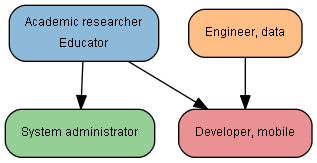

In [42]:
gr_test1 = pydotplus.graph_from_dot_data(GraphDot.graphStr(cg_ml))
Image(gr_test1.create_png())

## Weighted JobSat Mean + Confidence Intervals - Bar Chart

Code to display weighted JobSat mean with confidence intervals on a bar chart.

In [43]:
def jobSatMeanAnd_CI(df, ci_pct=85, bootstrap_n = 10000):
    """
    For a single DevType, compute the mean satisfaction and confidence interval.
    
    Arguments:
        df: DataFrame with columns 'DevTypeWeight' and 'WeightedJobSat'
        ci_pct: Confidence interval size, in percent; default 90%.
        bootstrap_n: Number of bootstrap iterations for compuation of confidence intervals.
        
    Return:
        Tuple of: weighted mean job satisfaction score for this DevType, lower error 
        bound delta, upper error bound delta.
    """
    source_sample = df[['DevTypeWeight', 'WeightedJobSat']]
    # The job satisfaction of an individual is divided among all their roles.
    # The mean job satisfaction for a role is given by the sum of these divided ("weighted") 
    # job satisfaction scores, divided by the sum of the weights. Each weight is the reciprocal
    # of the number of roles of an individual.
    source_mean = source_sample.WeightedJobSat.sum() / source_sample.DevTypeWeight.sum()
    
    mean_list = [] # list of means from bootstrap sample
    
    for _ in range(bootstrap_n):
        sample = source_sample.sample(n=source_sample.shape[0], replace=True)
        mean_list.append(sample.WeightedJobSat.sum() / sample.DevTypeWeight.sum())
    
    ci_tail_pct = (100 - ci_pct) / 2
    percentiles = np.percentile(mean_list, [ci_tail_pct, 100-ci_tail_pct])
    # print(percentiles)
    lower_bound_delta = source_mean - percentiles[0]
    upper_bound_delta = percentiles[1] - source_mean
    
    return source_mean, lower_bound_delta, upper_bound_delta
    

In [44]:
def clusterJobSatMeanAnd_CI(df, clusterList, ci_pct=85, bootstrap_n = 1000):
    """
    For the devTypes in a ClusterGraph, compute the mean satisfaction and confidence interval.
    Also return the color to use for each devtype in a bar chart, indicating the cluster they
    belong to.
    
    Arguments:
        df: DataFrame with columns 'DevTypeWeight' and 'WeightedJobSat'
        clusterList: The `clusterlist` field of a ClusterGraph, indicating how devTypes are clustered.
        ci_pct: Confidence interval size, in percent.
        bootstrap_n: Number of bootstrap iterations for compuation of confidence intervals.
        
    Return
        - List of (<tuple from JobSatMeanAnd_CI>, <devtype_name>), one per devType
        - List of colors to use for each devType (same order as previous list)
    """
    # Create a list of devType names and corresponding colors, according to the ordering
    # implied by the clusterList.
    devTypes = []; colors = []
    
    # Sort clusters by the median score of their contained devtypes
    sorted_clusters = sorted(clusterList, 
                             key=lambda cluster: np.median([x.score for x in cluster.devtypes]),
                             reverse=True)
    
    # All the devTypes in a cluster get the same color
    for cluster in sorted_clusters:
        clusterColor = Colors.get_color(cluster.id)
        for dt in sorted(cluster.devtypes, key=lambda x: x.score, reverse=True):
            devTypes.append(dt.name)
            colors.append(clusterColor)
    
    mean_ci_list = []
    for devtype in devTypes:
        devtype_df = df[df.DevType == devtype]
        mean_ci = jobSatMeanAnd_CI(devtype_df, ci_pct, bootstrap_n)
        # link devtype to its stats 
        mean_ci_list.append((mean_ci, devtype))
        
    
    return mean_ci_list, colors

**Example call to clusterJobSatMeanAnd_CI**

In [45]:
cg_ml.clusters

[Cluster(id=0, devtypes=[DevType(id=0, name='Academic researcher', score=2.697746076444665), DevType(id=3, name='Educator', score=2.69423547249967)]),
 Cluster(id=1, devtypes=[DevType(id=1, name='Engineer, data', score=2.681527954273926)]),
 Cluster(id=2, devtypes=[DevType(id=2, name='System administrator', score=2.6227522982018825)]),
 Cluster(id=3, devtypes=[DevType(id=4, name='Developer, mobile', score=2.5887855975204195)])]

In [47]:
stats, color_list = clusterJobSatMeanAnd_CI(ac_job_sat_weighted, cg_ml.clusters)

In [48]:
print(stats, '\n')
print(color_list)

[((2.697746076444665, 0.04783515179900899, 0.04298286085742831), 'Academic researcher'), ((2.69423547249967, 0.04795616811170689, 0.04677626210360053), 'Educator'), ((2.681527954273926, 0.040553192460286436, 0.03960470576464825), 'Engineer, data'), ((2.6227522982018825, 0.03375461528759738, 0.030928327547278034), 'System administrator'), ((2.5887855975204195, 0.025716467847590962, 0.026128028949688797), 'Developer, mobile')] 

['#1f77b480', '#1f77b480', '#ff7f0e80', '#2ca02c80', '#d6272880']


### Bar Chart

In [127]:
def barPlotMeanAnd_CI(mean_ci_list, color_list, val_name='Mean Job Satisfaction'):
    """
    Create bar plot + confidence intervals for specified categories and CIs.
    
    Arguments:
        mean_ci_list: List of ((<mean>, <ci_low_delta>, <ci_hi_delta>), <category_name>)
    """
    stats, cat_names = tuple(zip(*mean_ci_list))
    
    # Use shorter name, if available
    cat_names = [DISPLAY_NAMES.get(name, name) for name in cat_names]
    
    means = [mean for mean,_,_ in stats]
    
    y_err = [[lo for _, lo, _ in stats],
             [hi for _, _, hi in stats]]
    
    data = pd.DataFrame(data=means, index=cat_names, columns=[val_name])
    
    data.plot.bar(figsize=(10,6), ylim=(2.4,2.9), yerr=y_err, legend=False, color=[color_list], edgecolor='black')
    plt.ylabel('Weighted Mean Job Satisfaction')
    plt.show()

**Example Bar Chart**

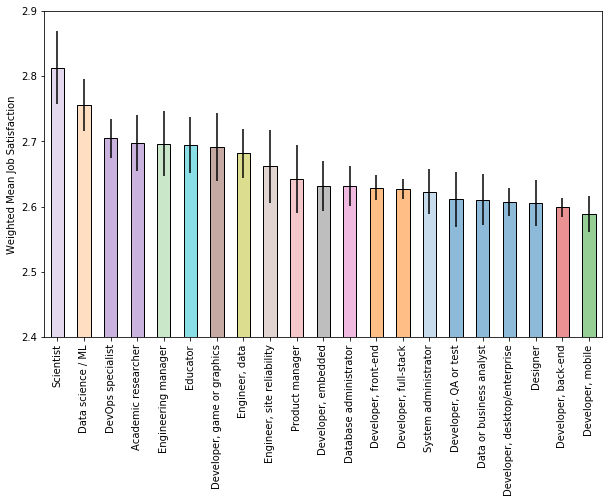

In [128]:
barPlotMeanAnd_CI(stats, color_list)

## Compare One to Many - Bar Chart

A limitation of the cluster digraph +  mean/confidence interval bar chart visualization is that its indication of significant differences is dependent on the selection of a p-value threshold. It is less successful in communicating **degrees** of significance. 

The following visualization accurately reflects p-values of differences between one category and all other categories. Reciprocal p-values are shown so that larger bars indicate greater significance. A bar above the bottom dotted line indicates significance at the 0.05 level; above the top dashed line indicates significance at the 0.01 level. A red bar indicates that the developer type in the title has a significantly lower mean satisfaction score; green indicates significantly higher.

An ensemble of these visualizations (one per category) provides an accurate visualization of the standing of each category relative to the others.

Another possible shortcoming of the cluster digraph may be a tendency to interpret nodes appearing at a high level of the digraph as superior to those at lower levels. However, this is true **only** if there is a directed edge from the nodes in question to inferior nodes. For example, nodes corresponding to a statistic drawn from a sample distribution with a large variance are likely to appear at or near the top level of the digraph simply because the difference from other high-level nodes is not statistically significant.

This potential source of misinterpretation is not present in the following "comparison to many" bar chart. Categories with a large sample distribution variance will be visually evident in this visualization. (See the example calls to multi_bar_compare_others() below for Product Manager and Site Reliability Engineer, two large-variance categories.)

In [191]:
def barCompareOthers(mx, subjectDt, figsize=None, ax=None, labels=True):
    """Plot the significance (inverse p-value) of the mean difference between the subject dev type
    and all others.
    
    Significant (p<0.5) negative mean differences are rendered red; significant positive mean 
    differences are rendered green. Two orizontal lines on the chart indicate levels of p=0.05 and 
    p=0.01.
    
    Args
        mx (PairwiseJobSatMx): Mean diff and p-values for pairs of dev types
        subjectDt (int): index of dev type to compare to all others
        
    """
    def invert_pval(x):
        return 1/x if x > 0 else 200
    
    score_name_list = []
    sign_list = []
    shortDevTypeList = [DISPLAY_NAMES.get(name, name) for name in mx.devTypeList]
    
    for ix, name in [(ix, name) for ix,name in enumerate(shortDevTypeList) if ix != subjectDt]:
        sign = -1 if mx.mean_diff[subjectDt, ix] < 0 else 1
        sign_list.append(sign)
        # sort by (signed_pval, mean_diff) as many identical signed_pval are possible (see invert_pval())
        sort_key = (sign*invert_pval(mx.p_vals[subjectDt, ix]), mx.mean_diff[subjectDt, ix])
        score_name_list.append((sort_key, name))
    score_name_list.sort()
    
    # (neg, large), (neg, small), (pos, small), (pos, large)
    colordict = {(True, True): 'indianred', (True, False): 'peru', (False, False): 'peru', (False, True): 'yellowgreen'}
    colors = [colordict[(sort_key[0]<0), (abs(sort_key[0])>=20)] for sort_key, _ in score_name_list]
    bar_df = pd.DataFrame(data = [abs(sort_key[0]) for sort_key, _ in score_name_list],
                          index = [name for _, name in score_name_list],
                          columns=['inverse p-val'])
    bar_df.plot.bar(figsize=figsize, ylim=(0,110), legend=False, color=[colors], ax=ax);
    if not labels:
        ax.set_xticks([], []) #(['']*len(score_name_list))
    ax.axhline(y=20, linestyle='dotted', label='p=0.05')
    ax.axhline(y=100, linestyle='--', label='p=0.01')
    if labels:
        ax.set_ylabel('inverse p-val')
    subject_dt_name = mx.devTypeList[subjectDt]
    ax.set_title(DISPLAY_NAMES.get(subject_dt_name, subject_dt_name), fontweight='semibold')
    # plt.legend()
    #plt.show()

In [179]:
def sort_dt_ix_by_mean(mx, dt_ix_list):
    """Sort DevType indices by their JobSat mean, in descending order.
    
    Args:
        mx (PairwiseJobSatMx): Source for mean JobSat scores
        dt_ix_list (list of int): Indices of DevTypes of interest
        
    Return:
        A list of the supplied DevType indices, now sorted by JobSat mean.
    """
    dt_ix_set = set(dt_ix_list)
    compare_to = 2 # mobile developer
    scored_dt_ix = [(mean, dt_ix) for dt_ix, mean in enumerate(mx.devtype_means) if dt_ix in dt_ix_set]
    scored_dt_ix.sort(reverse=True)
    return [dt_ix for mean, dt_ix in scored_dt_ix]

In [181]:
def multi_bar_compare_others(mx, dt_ix_list, nrows, ncols, figsize, labels=True, sort_dts=True):
    """Plot a matrix of devtype comparison charts.
    
    Args:
        mx (PairwiseJobSatMx): Source for comparisons of DevTypes
        dt_ix_list: list of indices of DevTypes to compare
        nrows: Number of rows of plots to create
        ncols: Number of columns of plots to create
        figsize: Overall size of the figure
    """
    if sort_dts:
        dt_ix_list = sort_dt_ix_by_mean(mx, dt_ix_list)
    fig = plt.figure(figsize=figsize)
    for ix, dt_ix in enumerate(dt_ix_list):
        ax = fig.add_subplot(nrows, ncols, ix+1)
        barCompareOthers(mx, dt_ix, figsize=figsize, ax=ax, labels=labels)

### Example

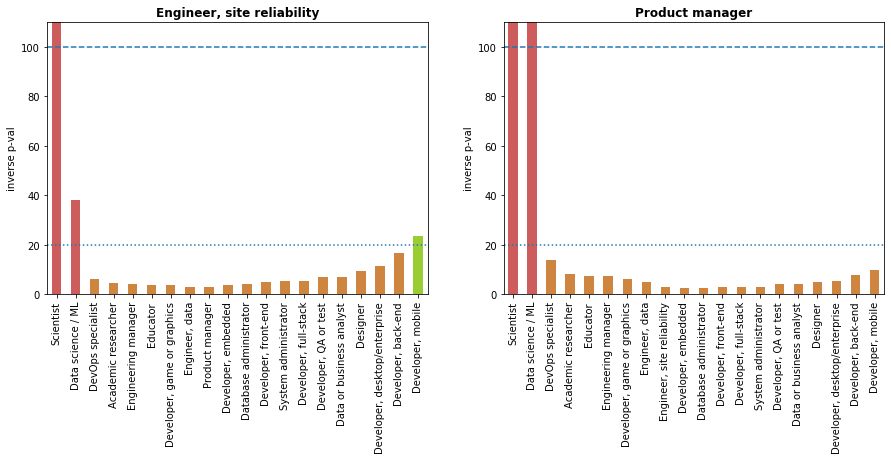

In [196]:
# Prod Mgr, and Site Reliability
multi_bar_compare_others(ac_mx, [18, 20], 1, 2, figsize=(15,5), labels=True)

# Compare Developer Satisfaction

Here we address several of the questions introduced in **Section 1** **Business Understanding**:
2. How do developer roles compare to one another in the job satisfaction reported in the survey?
3. Are the reported differences in job satisfaction among developer roles statistically significant?

In [55]:
# Exclude Sr. Executive/VP and Marketing or Sales. Many fewer instances with these types, and
# for the blog post I choose to focus on roles with software focus.
relevant_devtypes = ['Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Developer, mobile', 'Designer',
       'Developer, front-end', 'Developer, back-end',
       'Developer, QA or test', 'DevOps specialist',
       'Developer, game or graphics', 'Database administrator',
       'Developer, embedded applications or devices', 'Engineer, data',
       'Educator', 'System administrator', 'Data or business analyst',
       'Academic researcher',
       'Data scientist or machine learning specialist',
       'Engineering manager', 'Product manager', 'Scientist', 'Engineer, site reliability']

**Compute mean differences and p-vals for all DevType pairs**

In [56]:
ac_mx = all_pairwiseJobSatDiffAndPval(ac_job_sat_weighted, devTypeList=relevant_devtypes, bootstrap_n = 5000)

In [60]:
# Save the results of all_pairwiseJobSatDiffAndPval()
import pickle
with open(r'.\output\all_mx.pickled', 'wb') as fyl:
    pickle.dump(ac_mx, fyl)

In [67]:
# Load mean differences and p-vals for all DevType pairs
#with open(r'.\output\all_mx.pickled', 'rb') as fyl:
#    tmx1 = pickle.load(fyl)

**Compute DevType clusters digraph, and generate graph image with graphviz**

In [68]:
ac_cg = ClusterGraph(ac_mx)
ac_gr = pydotplus.graph_from_dot_data(GraphDot.graphStr(ac_cg))
ac_gr.write_png(r'output\ac_graph.png')

True

In [70]:
# Transitive reduction of graph edges to simplify graph
import subprocess
res = subprocess.run(['tred'], text=True, input=GraphDot.graphStr(ac_cg), capture_output=True)
ac_gr_reduced = pydotplus.graph_from_dot_data(res.stdout)
ac_gr_reduced.write_png(r'output\ac_graph_reduced.png')

True

**Generate Bar Chart**

In [72]:
stats, color_list = clusterJobSatMeanAnd_CI(ac_job_sat_weighted, ac_cg.clusters, bootstrap_n=5000)

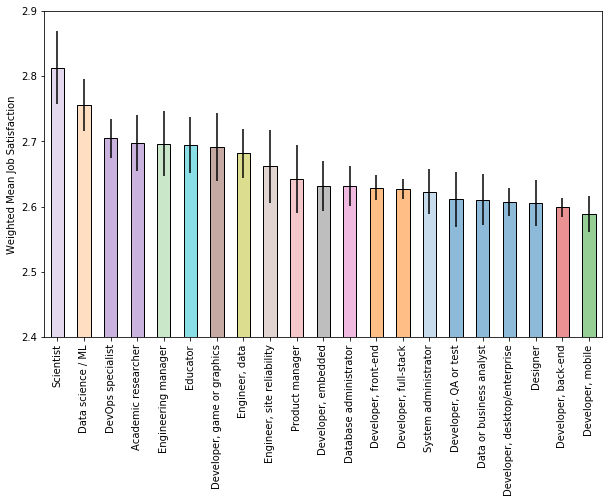

In [129]:
barPlotMeanAnd_CI(stats, color_list)

**One to Many Comparison Plot**

In [111]:
list(enumerate(ac_mx.devTypeList))

[(0, 'Developer, desktop or enterprise applications'),
 (1, 'Developer, full-stack'),
 (2, 'Developer, mobile'),
 (3, 'Designer'),
 (4, 'Developer, front-end'),
 (5, 'Developer, back-end'),
 (6, 'Developer, QA or test'),
 (7, 'DevOps specialist'),
 (8, 'Developer, game or graphics'),
 (9, 'Database administrator'),
 (10, 'Developer, embedded applications or devices'),
 (11, 'Engineer, data'),
 (12, 'Educator'),
 (13, 'System administrator'),
 (14, 'Data or business analyst'),
 (15, 'Academic researcher'),
 (16, 'Data scientist or machine learning specialist'),
 (17, 'Engineering manager'),
 (18, 'Product manager'),
 (19, 'Scientist'),
 (20, 'Engineer, site reliability')]

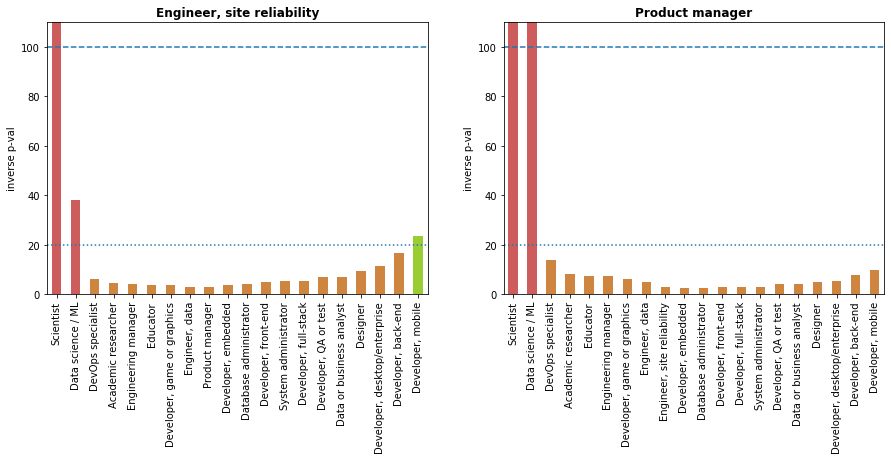

In [196]:
# Prod Mgr, and Site Reliability
multi_bar_compare_others(ac_mx, [18, 20], 1, 2, figsize=(15,5), labels=True)

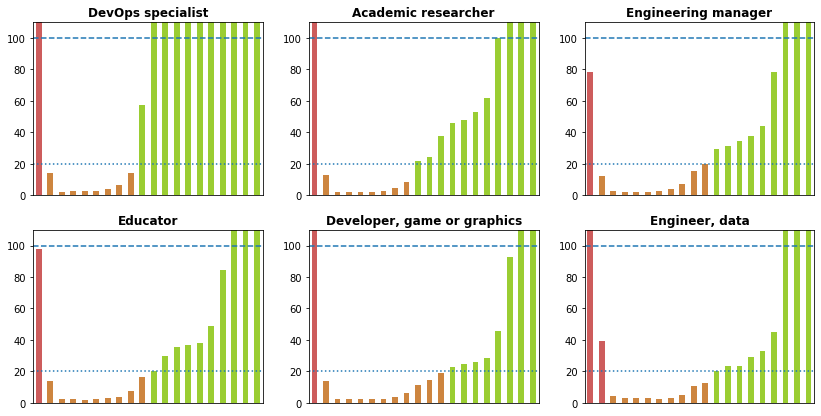

In [197]:
# Level 2, without prod mgr, site reliability
multi_bar_compare_others(ac_mx, [8, 17, 11, 12, 7, 15], 2, 3, figsize=(14,7), labels=False)

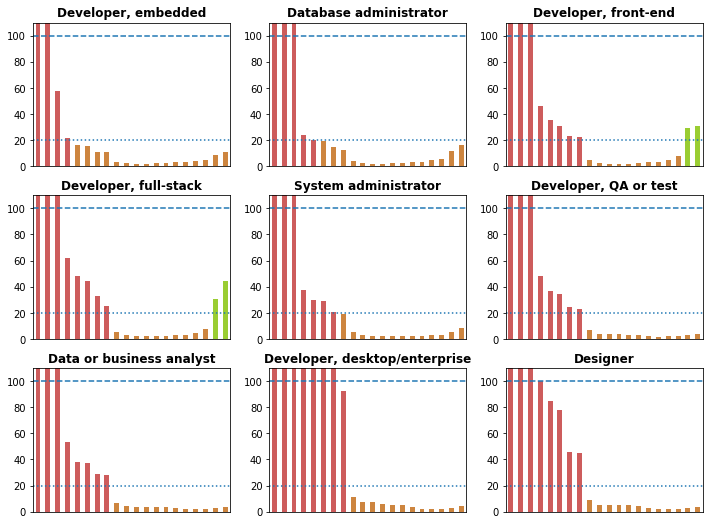

In [192]:
# Level 3
multi_bar_compare_others(ac_mx, [6, 14, 0, 3, 4, 1, 13, 9, 10], 3, 3, figsize=(12,9), labels=False)

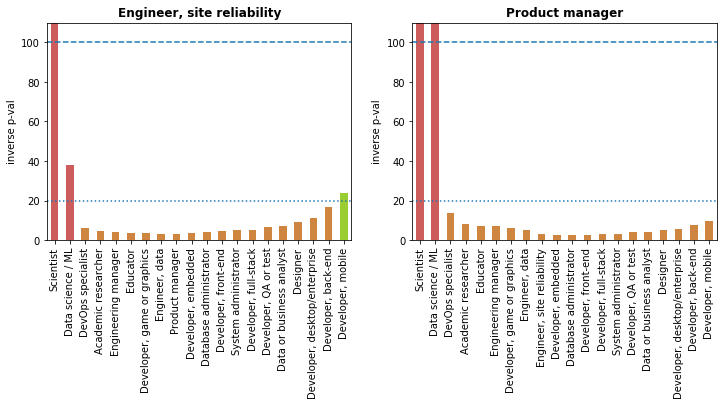

In [187]:
multi_bar_compare_others(ac_mx, [18, 20], 1, 2, figsize=(12,4))

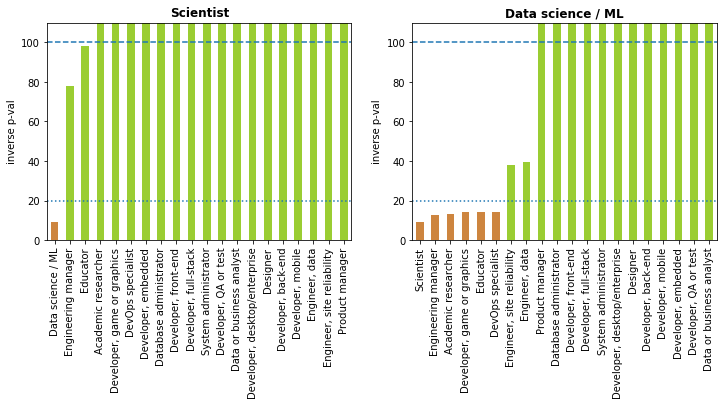

In [198]:
# top two
multi_bar_compare_others(ac_mx, [19, 16], 1, 2, figsize=(12,4))

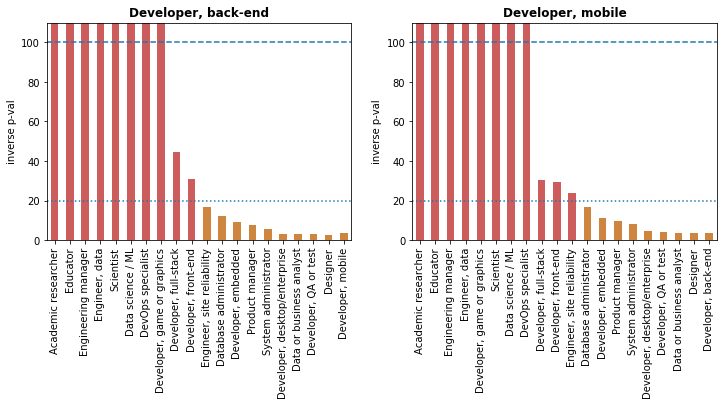

In [199]:
# bottom two
multi_bar_compare_others(ac_mx, [2, 5], 1, 2, figsize=(12,4))